In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
# 加载iris数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

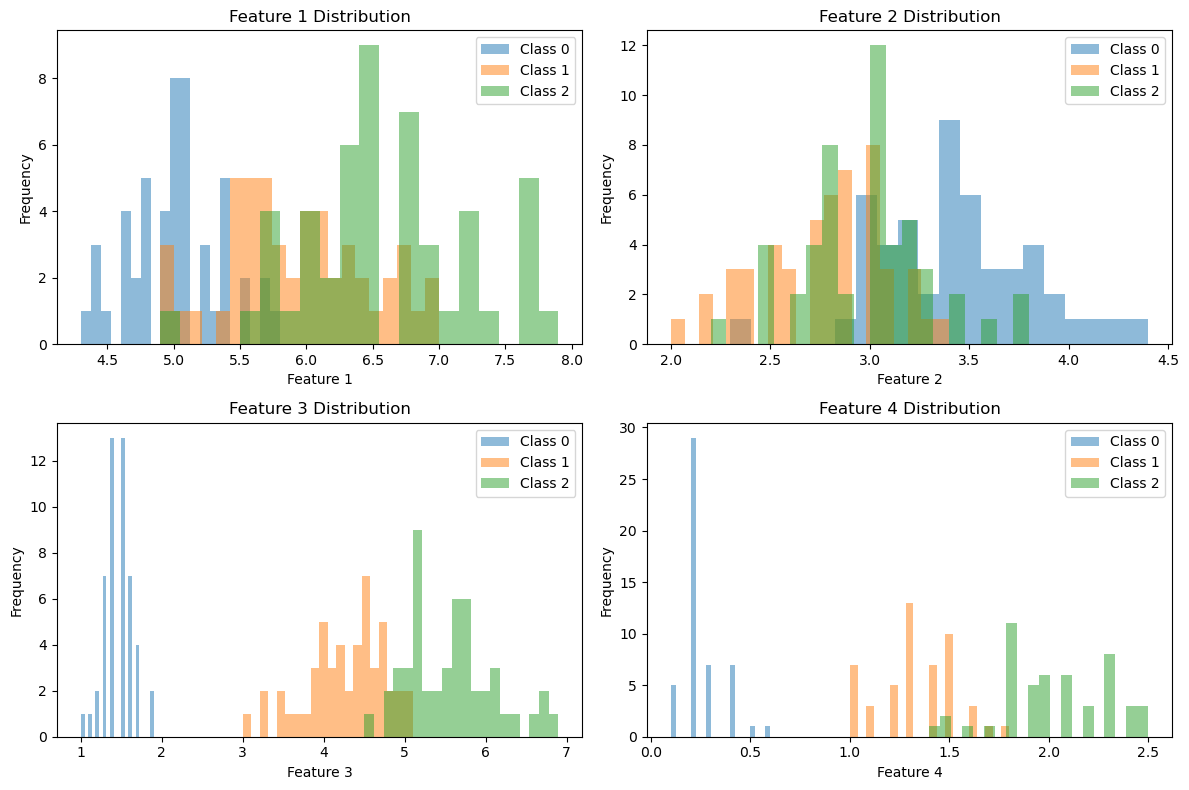

In [27]:
# 可视化每个类别在每个特征上的分布
plt.figure(figsize=(12, 8))

for i in range(X.shape[1]):
    plt.subplot(2, 2, i + 1)
    for j in range(len(np.unique(y))):
        plt.hist(X[y == j, i], bins=20, label=f'Class {j}', alpha=0.5)
    plt.title(f'Feature {i + 1} Distribution')
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1017)

In [23]:
# 使用贝叶斯分类器进行训练
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [24]:
# 预测测试集
y_pred = model.predict(X_test)

In [25]:
# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 90.00%


接下来考虑将特征使用主成分分析降成两个维度，再进行分类

In [41]:
# 特征降维到两维
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [42]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=1017)

In [43]:
# 使用贝叶斯分类器
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [44]:
# 预测测试集
y_pred = clf.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.67%


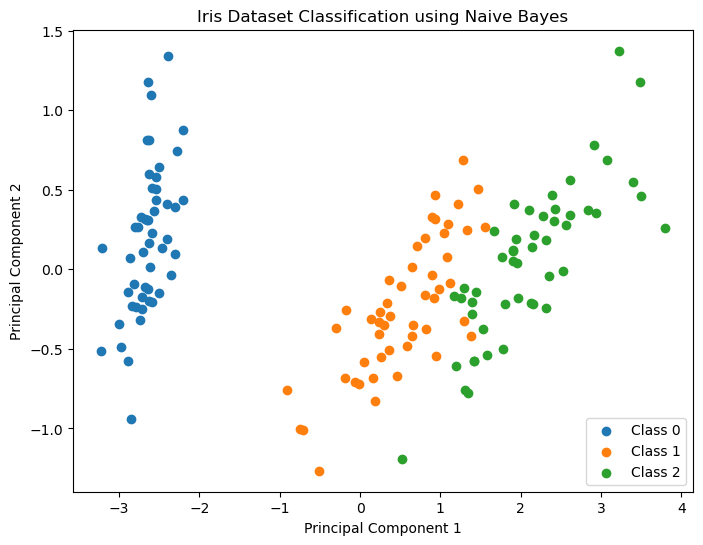

In [45]:
# 可视化分类结果
plt.figure(figsize=(8, 6))

for i in range(3):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], label=f'Class {i}')

plt.title('Iris Dataset Classification using Naive Bayes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

接下来考虑将特征使用主成分分析降成三个维度，再进行分类

In [46]:
# 使用PCA将特征降到三维
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

In [47]:
# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=1017)

In [48]:
# 使用贝叶斯分类器进行分类
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [49]:
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.67%


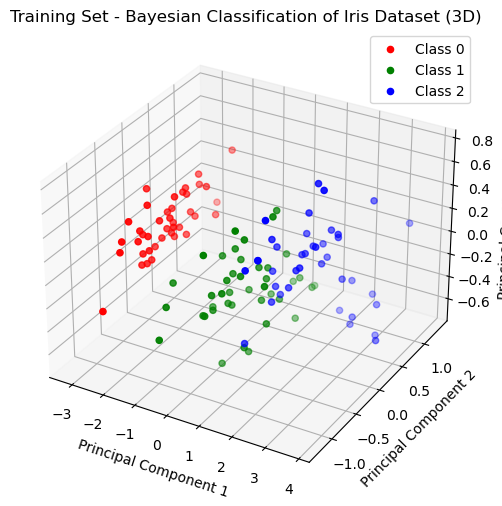

In [50]:
# 可视化训练集结果
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']
for i in range(3):
    indices = y_train == i
    ax.scatter(X_train[indices, 0], X_train[indices, 1], X_train[indices, 2], c=colors[i], label=f'Class {i}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Training Set - Bayesian Classification of Iris Dataset (3D)')
ax.legend()
plt.show()